**Hossein ATRSAEI**


# Homework 5: Support Vector Machines (SVM)

In this homework we will implement the Suport Vector Machine algorithm using Gradient Descent.

We use as reference the chapter 15 of Understanding Machine Learning.

This exercise can be done in pairs. **You must first copy this notebook to your own google drive, mount it and complete the code as requested. Some of the questions require you to write on a comment cell.**

After completing the notebook you must download it and manually send it before the deadline by email to the email: si221.micas911@gmail.com

Copy this notebook and insert the corresponding names on the file.

**If you have any questions feel free to send an email to the TA's:**

### julien.beguinot@telecom-paris.fr

### breno.skuk@gmail.com

# Part 1: From theory to algorithm

<img src="https://vitalflux.com/wp-content/uploads/2020/07/Screenshot-2020-07-07-at-3.44.38-PM.png">

**Figure 1:** Visualization in $\mathbb{R^2}$ of a hyperplane $W$, margin and samples.

<img src="https://www.holehouse.org/mlclass/12_Support_Vector_Machines_files/Image%20[12].png">

**Figure 2:**  Notice that the epigraph (set of points above the function) of the cost  is convex. This would not hold for $l_{0-1}$.

## Support Vector Machines (SVM) in a nutshell

The SVM algorithmic paradigm performs a search for “large margin” separators. Roughly speaking, a halfspace separates a training set with a large margin if all the examples are not only on the correct side of the separating hyperplane but also far away from it. **Figure 1** offers an intuitive understanding of the concept of margin.


The objective of the SVM algorithm is thus to find not only a hyperplane that separates the data, but to impose the condition that it maximizes the distance between the points of both labels and the hyperplane.

To solve this learning problem, we can write a regularized loss function that will include the notion of "distance to a margin". This Loss function can be shown to follow certain conditions, such as convexity, and thus, learnable trough Gradient Descent.

The development of such a loss function and associated proofs are thoroughly discussed in the book Understanding Machine Learning. We recommend interested students (that will eventually have the time) towards Chapter 12, which discusses convex learning problems and establishes how one can use a surrogate loss function instead of the $l_{0-1}$ (Which is not convex as can be easily verified by its non-convex ephigraph), Chapter 13, which tackles regularization, Chapter 14, which discusses Gradient Descent learning methods, and Chapter 15, which applies all of the previous concepts to finally define equation $(1)$.

Although the theory to achieve a precise understanding of why and how Support Vector Machine work requires much time and the application of different domains of mathematics, its inner workings remain quite intuitive.

In this exercise, we will directly proceed to the algorithmic implementation of SVM, which, it turns out, requires less time to implement than to fully understand.

**Optimization and Gradient Descent**

Let $S^N = (x_i,y_i)_{i\in[m]}$ be a training set with $N$ samples, where $x \in \mathbb{R}^{d}$ and $y \in \{-1,+1\}$.

Let $W \in \mathbb{R}^{d}$ define a hyperplane.

For the following deduction, we will consider the case where the bias has been incorporated in the first coordinate of the weights, as well as the data.

We define the following cost function:
$$J(W) =  \left[\frac{\lambda}{2}\lVert W \rVert^2 + \frac{1}{N} \sum_{i=1}^{N} \max(0, 1 - y_i \cdot (W^T \times x_i)) \right] \tag{1}$$

The notion of achieving a distance to a margin appears on equation $(1)$ for each $x_i$ as $\langle W,x_i \rangle = W^T\times x_i$, where we note $W^T$ as the transpose of the vector $W$.

Furthermore, when using the $\max (0, 1-y_i \cdot (W^T \times x_i))$ we include a restriction on the decision boundary to cost function, as shown in **Figure 2**. This corresponds to applying $l_{hinge}$ as a surrogate loss function instead of $l_{0-1}$, which is not convex with respect to $W$.

To restrict the influence of noisy data, we also include a regularization term controlled by a factor $\lambda \geq 0$. This term appears on equation $(1)$ as $||W||^2$.

We will then chose a hyperplane $\hat{W}$ by solving the following minimization problem.


$$  \hat{W} = arg \min_W \left (  \frac{\lambda}{2}||W||^2 + \frac{1}{N} \sum^N_{i=1}\max(0, 1-y_i \cdot (W^T \times x_i)) \tag{2} \right )$$

The gradient of $J$ wrp to $W$ is given by:

$$\nabla J(W) = \lambda W + \frac{1}{N} \sum_{i=1}^{N} \textbf{I}\{y_i \cdot (W^T \times x_i) \leq 1\} (-y_i \cdot x_i) \tag{3}$$

Where $\textbf{I}$ is the indicator function. The indicator basically tells us which case of **Figure 2** we are, as the gradient of $y_i(W^T\times x_i)$ is simply $y_i\cdot x_i$. Can you see the similarity with the perceptron update rule?

Since $(2)$ this is a quadratic optimization problem, we can apply the learning rule defined by the gradient descent and write the update as:

$$W^{(t+1)} \leftarrow W^{(t)} - lr \cdot \nabla J(W^{(t)}) \tag{4}$$

Finally, in practice, we can write:

$$W^{(t+1)} \leftarrow W^{(t)}(1 - \lambda') - lr \cdot\frac{1}{N} \sum_{i=1}^{N} \textbf{I}\{y_i \cdot ({W^{(t)}}^T \times x_i) \leq 1\} (-y_i \cdot x_i) \tag{5}$$

Where $\lambda' = \lambda \cdot lr$.

The algorithm for solving the SVM is iteratively given by computing the gradient at each iteration and updating the hyperplane $W^{(t)}$ using the formula above.

**The hyperparameters of a SVM model:**


*   The initialization $W^{(0)}$.
*   The learning rate $lr$.
*   The regularization term $\lambda$.
*   The number of iterations.

**Final considerations:**

The regularization can be seen as an "inertia" related to changing the weight. Note that adding/subtracting $W^{(t)}$ to itself will not change the classification unless it adds up to the zero vector (why?).

The term corresponding to the gradient of $\mathcal{l}_{hinge}$ will only have nonzero values whenever $x_i$ is missclassified accounting for the margin (why?).

The learning rate value is chosen by the programmer, but it should not be large (why?).


## Question 1:
The SVM minimization problem is closely related to the perceptron algorithm. Discuss at least one difference and one similarity between the objective functions.



**ANSWER:**

Both Perceptron and SVM are linear classifiers, meaning they aim to find a hyperplane to separate data points into different classes. However, Perceptron aims to find any hyperplane that correctly classifies the data, while SVM aims to find the hyperplane with the maximum margin between the classes. This margin acts as a buffer zone, making SVM more robust to slight variations in the data and potentially leading to better generalization performance.

## Question 2:
Complete the functions defined below

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
# Your Imports go here

### Compute the cost and its gradient using previously defined equations

In [3]:
def getCost(W, X, Y, lam):
  """
  Compute the cost

  Parameters:
  -----------
  `W` : SVM Weights [d x 1]
  `X` : Input data [d x N]
  `Y` : Labels [1 x N]
  `lam` : Regularization parameter

  Returns:
  --------
  `J` : Computed cost

  """
  N = X.shape[1]
  J = (lam/2) * np.linalg.norm(W)**2 + (1/N) * np.sum(np.maximum(0, 1 - Y * np.dot(W.T, X)))

  return J


def getGradients(W, X, Y, lam):
  """
  Compute the cost gradients

  Parameters:
  -----------
  `W` : SVM Weights [d x 1]
  `X` : Input data [d x N]
  `Y` : Labels [1 x N]
  `lam` : Regularization parameter

  Returns:
  --------
  `dJ` : Computed gradients

  """
  N = X.shape[1]
  d = X.shape[0]
  u = (Y * np.dot(W.T, X))
  Indicator = (u <= 1).astype(float)
  dJ = lam * W - (1/N) * np.dot(X, (Indicator * Y).T)

  return dJ

### Perform a Gradient Descent Step

In [4]:
def gradDescent(W, X, Y, lam, lr):
  """
  Update the weights with gradient descent

  Parameters:
  -----------
  `W` : SVM Weights [d x 1]
  `X` : Input data [d x N]
  `Y` : Labels [1 x N]
  `lam` : Regularization parameter
  `lr` : Learning Rate

  Returns:
  --------
  `W` : Updated weights [d x 1]

  """
  dJ = getGradients(W, X, Y, lam)
  W = W - lr * dJ

  return W

### SVM functions for training and testing

In [5]:
def svmTrain(X, Y, lam, lr, maxEpochs=2500, minCostDiff=1e-4):
  """
  Train the SVM Model

  Parameters:
  -----------
  `X` : Training inputs [d x N]
  `Y` : Training Labels [1 x N]
  `lam` : Regularization parameter
  `lr` : Learning Rate
  `maxEpochs` : Maximum number of epochs before stopping the training
  `minCostDiff` : Minimum cost difference

  Returns:
  --------
  `W` : Trained weights [d x 1]

  """
  d = X.shape[0]
  N = X.shape[1]
  # Randomly initialze the weights
  W = np.zeros((d, 1))
  Js = []
  converged = False # Boolean variable for convergence critereon
  J_prev = None
  while not converged:
    # Update the weights
    W = gradDescent(W, X, Y, lam, lr)
    # Compute the cost
    J = getCost(W, X, Y, lam)
    Js.append(J)
    # Check if the convergence critereon is met
    if J_prev is not None and abs(J_prev - J) <= minCostDiff:
      converged = True
    else:
      J_prev = J
    # Decrement the number of epochs
    maxEpochs -= 1
    # Check if the maximum number of epochs is reached
    if maxEpochs == 0:
      break

  return W, np.array(Js)

In [6]:
def svmTest(W, X, Y):
  """
  Test the SVM Model

  Parameters:
  -----------
  `W` : Trained weights [d x 1]
  `X` : Testing inputs [d x N]
  `Y` : Testing Labels [1 x N]

  Returns:
  --------
  `l01` :L_0_1 Loss
  `P` : Precision
  `R` : Recall

  """
  N = X.shape[1]

  # Make predictions using the learned weights
  predictions = np.dot(W.T, X)  # [1 x N]

  pred_labels = np.sign(predictions).flatten()  # Predicted labels [1 x N] flattened

  # Compute accuracy, precision, and recall using scikit-learn's built-in functions
  acc = accuracy_score(Y.flatten(), pred_labels)
  P = precision_score(Y.flatten(), pred_labels, zero_division=0)
  R = recall_score(Y.flatten(), pred_labels, zero_division=0)

  values = [acc, P, R]

  return acc, P, R

### Plot the data and the results
Functions for :

- Getting the decision boundry from the weights (with the positive and negative hyperplanes) and plotting it with the data.

- Cost function evolution.

In [57]:
def plotData(X, Y, W=np.array([]), tick_labels=None):
  """
  Plot the data alongside the decision boundary

  Parameters:
  -----------
  `W` : Trained weights [d x 1]
  `X` : Training and testing inputs [d x N]
  `Y` : Training and testing Labels [1 x N]

  """
  plt.figure(figsize=(7,5))
  sc = plt.scatter(X[0, :], X[1, :], c=Y[0,:], cmap='bwr')
  cb = plt.colorbar(sc)
  cb.set_ticks(np.sort(np.unique(Y)))
  if tick_labels != None:
    cb.set_ticklabels( tick_labels )
  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.title('Data')

  if W.size != 0:
    # Plot the decision boundary
    margin = 1 / np.linalg.norm(W)
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    x = np.linspace(x_min, x_max, 100)
    y = -(W[0, 0] * x) / W[1, 0]
    y_up = y + margin  # Shift up
    y_down = y - margin  # Shift down
    plt.plot(x, y, 'k--', label='Decision Boundary')
    plt.plot(x, y_up, 'k--', label='Margin')
    plt.plot(x, y_down, 'k--')
    plt.grid(True, linestyle='--', linewidth=0.5)
  plt.show()

def plotConvCurve(Js, lam, lr):
  """
  Plot the cost function evolution

  Parameters:
  -----------
  `Js` : Calculated costs at each epoch
  """
  plt.figure(figsize=(7,5))
  plt.plot(Js)
  plt.xlabel('Epoch')
  plt.ylabel('Cost')
  plt.title(f'Cost Function Evolution (lambda = {lam}, lr = {lr})')
  plt.show()

### Synthetic Data generation :
Consider a data set $\{x(n), d(n)\}^{200}_{n=1}$ consisting of $200$ points $x(n) = (x_1(n), x_2(n))$ and
their corresponding labels $d(n)$, such that the first $100$ points have label $d(n) = 1$ and
are generated according to a Gaussian distribution $x(n) ∼ \mathcal{N} ([1, 0] , \sigma^2
I)$, and such that
the other $100$ points have label $d(n) = 0$ and are generated according to a Gaussian
distribution $x(n) ∼ \mathcal{N} ([0, -1] , \sigma^2
I)$.

In [8]:
# Generate a random permutation of indices
def shuffle_data(X,Y):
    """
    Parameters:
    -----------
    X: R2 points [2 x N]
    Y: Labels [1 x N]

    Returns:
    --------
    permutated X: R2 points [2 x N]
    permutated Y: Labels [1 x N]

    """
    permutation = np.random.permutation(len(Y))
    return X[permutation], Y[permutation]

In [9]:
def genData(meanPos, meanNeg, var, N, shuffle = 1):
  """
  Generate synthetic data following the gaussian distribution

  Parameters:
  -----------
  `meanPos` : Mean for the Data with label d(n) = 1 [1 x 2]
  `meanNeg` : Mean for the Data with label d(n) = 0 [1 x 2]
  `sigmas` :  Standard deviation

  Returns:
  --------
  `X` : Input Data
  `Y` : Labels

  """
  #  Create zero data
  X_zero = np.random.multivariate_normal(meanNeg, var*np.identity(2), int(N/2))

  # Create ones data
  X_one = np.random.multivariate_normal(meanPos, var*np.identity(2), int(N/2))

  # Concatenate arrays along axis 0
  X = np.concatenate((X_zero, X_one), axis=0)

  # Create an array filled with ones and another filled with zeros
  ones_array = np.ones((int(N/2),1))
  zeros_array = np.zeros((int(N/2),1))

  # Concatenate the arrays along axis 0 to create Y
  Y = np.concatenate((ones_array, zeros_array), axis=0)
  Y = (Y - 0.5) * 2
  if shuffle:
    # shuffle data
    X,Y = shuffle_data(X,Y)
  X_ = X.T
  Y_ = Y.T
  return X_,Y_

### Putting everything together
- Plot the data

- Train the SVM Model using variance $\sigma^2 = 0.25$

- Plot the convergence curve

- Plot the data with the decision boundary

- Test the SVM Model and show the accuracy, precision and recall figures

- Compare the results with the previsouly implemented Perceptron. Comment the results.

In [58]:
def main(lr, lam):
  """
  Main function for training and testing the SVM

  Parameters:
  -----------
  `lam` : Regularization parameter
  `lr` : Learning Rate

  """
  X, Y = genData(meanPos=[1,0], meanNeg=[0,-1], var=0.25, N=200)
  plotData(X, Y)
  X_train, X_test, Y_train, Y_test = train_test_split(X.T, Y.T, test_size=0.2, random_state=42)
  W, Js = svmTrain(X_train.T, Y_train.T, lam, lr)
  plotConvCurve(Js, lam, lr)
  plotData(X, Y, W)
  acc, P, R = svmTest(W, X_test.T, Y_test.T)
  print(f'Accuracy: {acc}, Precision: {P}, Recall: {R}')

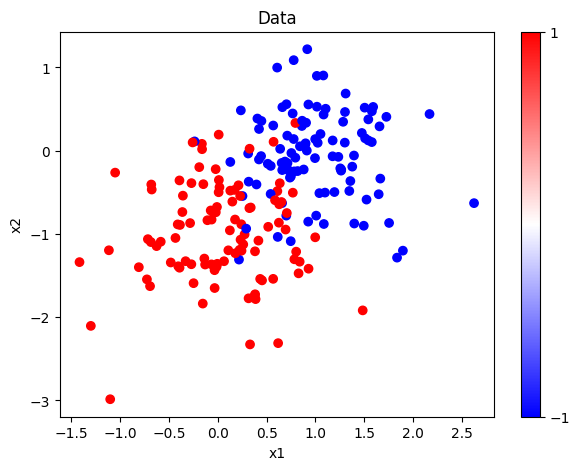

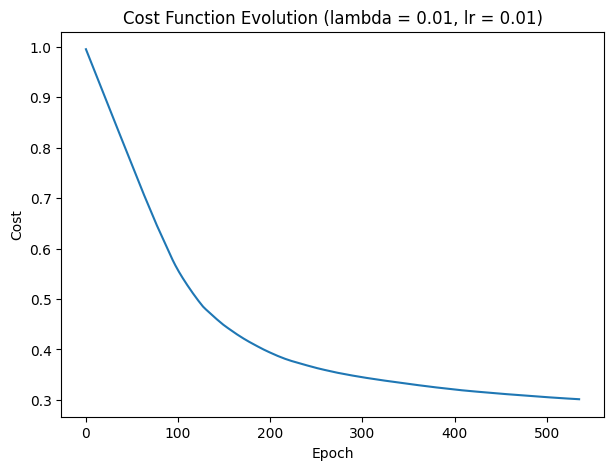

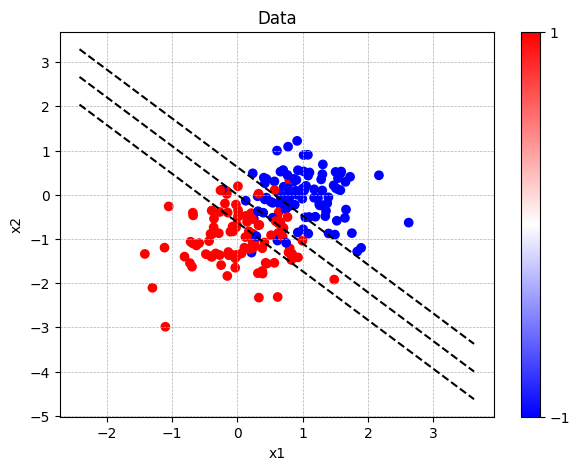

Accuracy: 0.85, Precision: 0.9, Recall: 0.8181818181818182


In [60]:
# Your Hyperparameters
lr = 0.01
lam = 0.01
main(lr, lam)

For the synthetic data (linearly separable), both SVM and Perceptron are expected to achieve good accuracy.
SVM is likely to have a more stable and robust solution due to the margin maximization.
Perceptron can be sensitive to noisy data and might find different solutions depending on initialization and data order.

# Part 2: SVM Kernel Trick

In the case where the data is linearly inseparable, a linear classifier like the previously described cannot produce a seperator that is capable of classifying the data correctly as seen in **Figure 3**.

One way to overcome this issue, is with the **kernel trick**, which naively can be seen a data preprocessing approach, to project input samples onto a different space (of possibly higher dimension), where the data is more likely to be linearly separable.

$\Phi(x)$ is the **kernel embedding function**, and maps the input data $x$ into another state space.
The following figures are some examples of the embedding in action:

<img src="https://vitalflux.com/wp-content/uploads/2020/07/Screenshot-2020-07-14-at-6.22.08-PM.png">

**Figure 3**: In the current one dimensional representation, data is clearly not separable by a hyperplane.

In the example of **Figure 3**, the data is distributed in a single dimension, and is impossible to seperate it using a linear classifier. If we apply the transformation $\Phi(x) : \mathbb{R} → \mathbb{R^2}$ given by $x ↦ (x,x^2)$
as the embedding function, we map the data into a 2D space (Figure 4), where the data can be linearly seperable.

<img src="https://vitalflux.com/wp-content/uploads/2020/07/Screenshot-2020-07-14-at-6.22.19-PM.png">

**Figure 4**: After application of an embedding function, the data is represented in a higher dimension. In this case it is visually clear that now it is possible to linearly separate the points by a hyperplane.

There is a variety of kernel embedding functions (polynomial, gaussian, RBF, sigmoid, ...) that map the data into different and higher dimensional spaces.

In this practice, we test the different kernel functions to see which one performs the best.

Finally, notice that in Figure 3 and Figure 4, it is visually clear that the kernel method application makes the data separable. This is not usually the case (can you use the same visual reasoning for let's say, an embedding from 32 dimensions into 64 dimensions?).

**Additional information for interested students:**

What we present here is in fact a really naive way of understanding the **kernel trick**, and in fact there is much more to it (there are books and courses dedicated solely to kernel methods!) and fortunately we do not have to choose kernels by intuition.

The famous Mercer theorem offers an approach to carefully select the kernel embedding function such that we don't need to necessarily compute the kernel embedding function of each point. Instead we compute the inner products between data points $k(x_i, x_j) = \langle \Phi(x_i), \Phi(x_j) \rangle$, and this is in fact the **kernel function** which can be shown to be less complex to compute than applying the actual transformation on each point. Elegant, right?

The matrix $K \in \mathbb{R}^{m \times m}$ with entries $K_{i,j} = k(x_i,x_j)$ defined w.r.p. to the datapoints $\{x_1,...,x_m\}$ is called the **kernel matrix**, such that  and for well choosen kernel functions it is positive definite. Do you have an intuition on how to achieve this?


 We point curious students that want to know more towards the very rich field of study of **Kernel Methods**.



## Question 3:
We now test the use of a polynomial kernel to make our data linearly separable. First, we define our data to be sampled from a concentric circles of different radius.

- Train the SVM on the data created above :
  - the linear (default) kernel
  - as well as the polynomial kernel.
- Plot the data projected in the polynomial kernel
- Comment the results.
- Can you think of another Kernel that would be better suited for the type of data (concentric circles)?




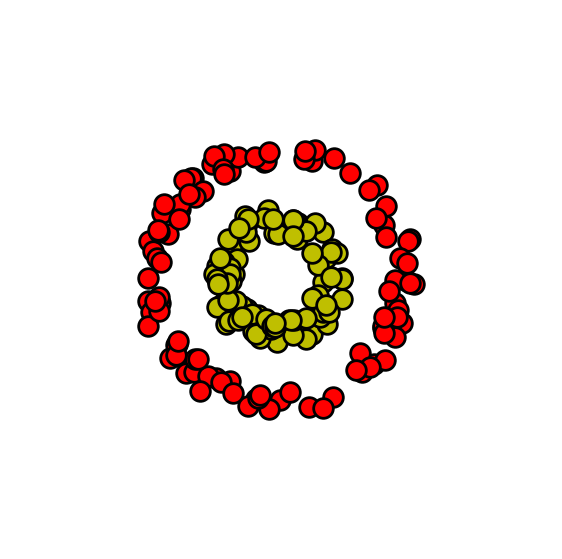

In [61]:
N = [100,100]

y = np.zeros((1, 200))
y[0, 100:] = 1

theta1 = 2*np.pi*np.random.rand(1,N[1])
r1 = .3 + .2*np.random.rand(1,N[1])
points1 = np.vstack((np.cos(theta1)*r1,np.sin(theta1)*r1))

theta2 = 2*np.pi*np.random.rand(1,N[1])
r2 = .8 + .2*np.random.rand(1,N[1])
points2 = np.vstack((np.cos(theta2)*r2,np.sin(theta2)*r2))

x = np.hstack((points1, points2))

plotp = lambda x,col: plt.scatter(x[0,:], x[1,:], s=200, edgecolors="k", c=col, linewidths=2)

plt.figure(figsize=(7, 7))

plotp(points1, 'y')
plotp(points2, 'r')

plt.axis("off")
plt.xlim(np.min(points2[0,:])-1,np.max(points2[0,:])+1)
plt.ylim(np.min(points2[1,:])-1,np.max(points2[1,:])+1)


plt.show()

In [62]:
print(f'data shapes : {x.shape}, {y.shape}')

data shapes : (2, 200), (1, 200)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

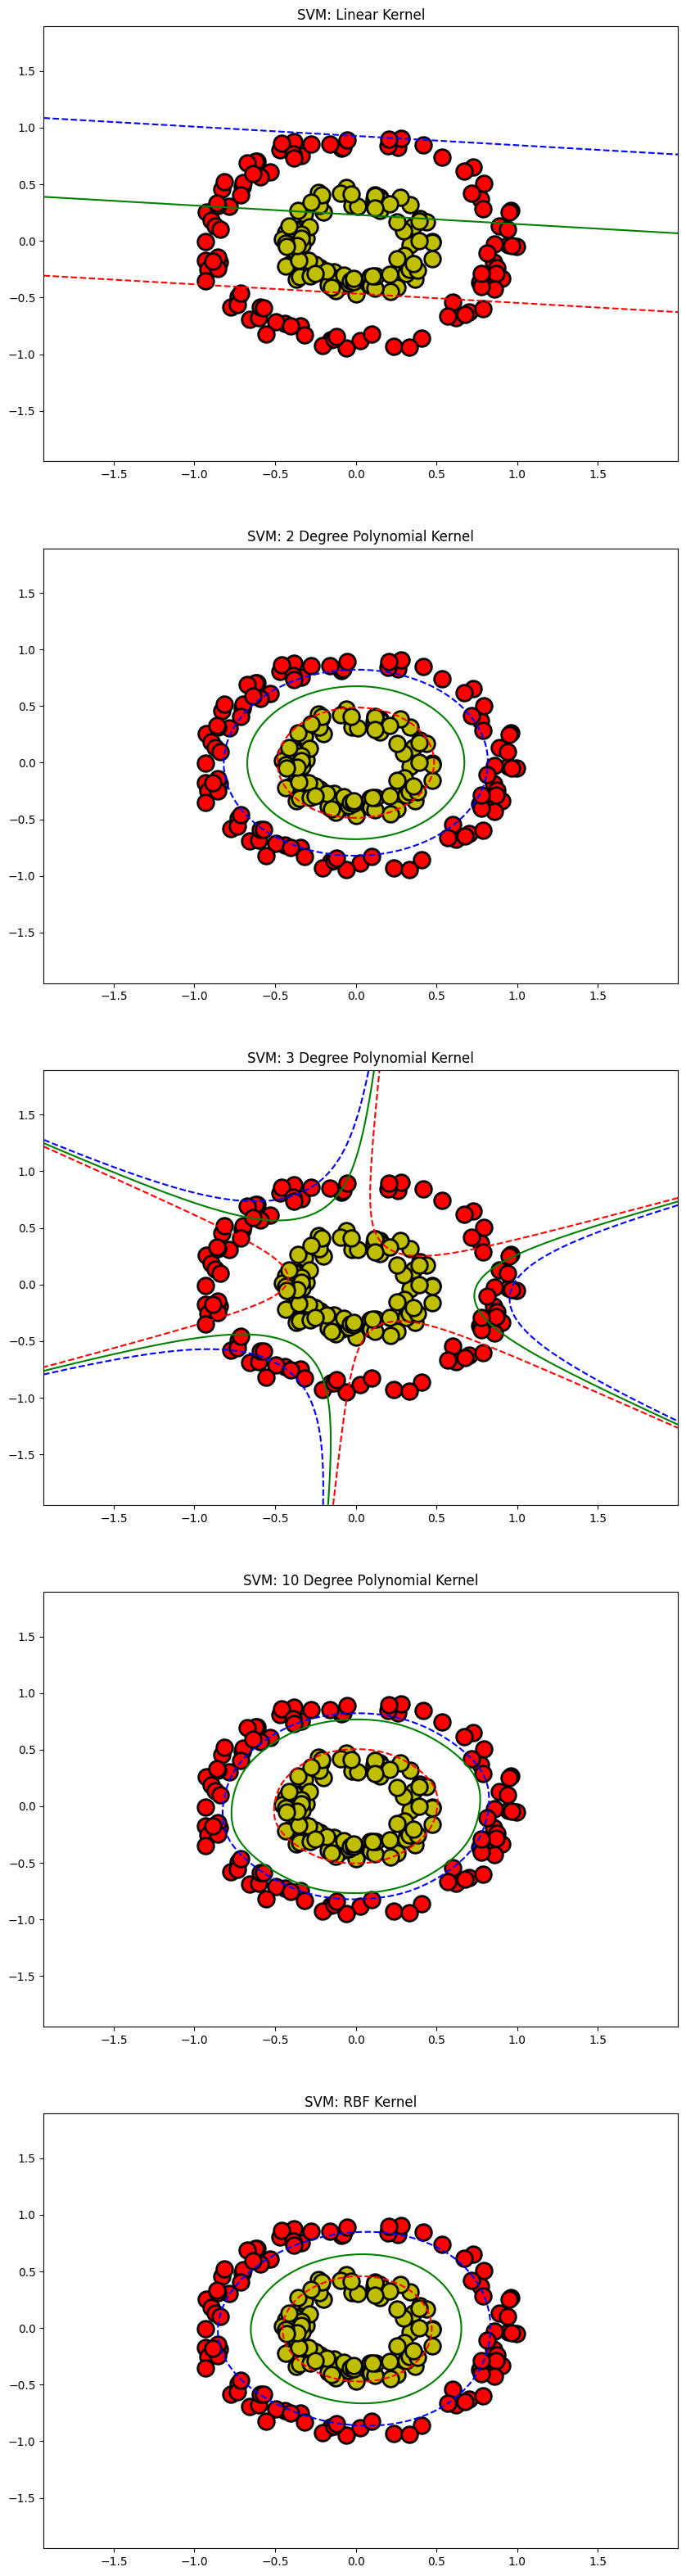

In [65]:
from sklearn.svm import SVC
x_min, x_max = x[0, :].min() - 1, x[0, :].max() + 1
y_min, y_max = x[1, :].min() - 1, x[1, :].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
plt.figure(figsize=(10, 40))

linear_svm = SVC(kernel='linear').fit(x.T, y.T)
Z_linear = linear_svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z_linear = Z_linear.reshape(xx.shape)
plt.subplot(5, 1, 1)
plotp(points1, 'y')
plotp(points2, 'r')
plt.contour(xx, yy, Z_linear, levels=[-1, 0, 1], colors=['red', 'green', 'blue'], linestyles=['--', '-', '--'])
plt.title('SVM: Linear Kernel')

polynomial_svm_1 = SVC(kernel='poly', degree = 2).fit(x.T, y.T)
Z_polynomial_1 = polynomial_svm_1.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z_polynomial_1 = Z_polynomial_1.reshape(xx.shape)
plt.subplot(5, 1, 2)
plotp(points1, 'y')
plotp(points2, 'r')
plt.contour(xx, yy, Z_polynomial_1, levels=[-1, 0, 1], colors=['red', 'green', 'blue'], linestyles=['--', '-', '--'])
plt.title('SVM: 2 Degree Polynomial Kernel')

polynomial_svm_2 = SVC(kernel='poly', degree = 3).fit(x.T, y.T)
Z_polynomial_2 = polynomial_svm_2.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z_polynomial_2 = Z_polynomial_2.reshape(xx.shape)
plt.subplot(5, 1, 3)
plotp(points1, 'y')
plotp(points2, 'r')
plt.contour(xx, yy, Z_polynomial_2, levels=[-1, 0, 1], colors=['red', 'green', 'blue'], linestyles=['--', '-', '--'])
plt.title('SVM: 3 Degree Polynomial Kernel')

polynomial_svm_3 = SVC(kernel='poly', degree = 10).fit(x.T, y.T)
Z_polynomial_3 = polynomial_svm_3.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z_polynomial_3 = Z_polynomial_3.reshape(xx.shape)
plt.subplot(5, 1, 4)
plotp(points1, 'y')
plotp(points2, 'r')
plt.contour(xx, yy, Z_polynomial_3, levels=[-1, 0, 1], colors=['red', 'green', 'blue'], linestyles=['--', '-', '--'])
plt.title('SVM: 10 Degree Polynomial Kernel')

rbd_svm = SVC(kernel='rbf', gamma=1).fit(x.T, y.T)
Z_rbf = rbd_svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z_rbf = Z_rbf.reshape(xx.shape)
plt.subplot(5, 1, 5)
plotp(points1, 'y')
plotp(points2, 'r')
plt.contour(xx, yy, Z_rbf, levels=[-1, 0, 1], colors=['red', 'green', 'blue'], linestyles=['--', '-', '--'])
plt.title('SVM: RBF Kernel')
plt.show()

# Part 3: Breast Cancer Classification
As discussed, kernel methods allow us to apply Machine Learning methods to different domains of research. Here, we will discuss such a case in the medical domain, specifically in the problem of Breast Cancer classification.

## Question 4:
Train the SVM on the dataset defined below, using the linear, polynomial and a kernel of your choice. Comment the results.

In [79]:
#Load breast cancer dataset
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
cancer_dataset = load_breast_cancer()

In [80]:
X = cancer_dataset.data
y = cancer_dataset.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

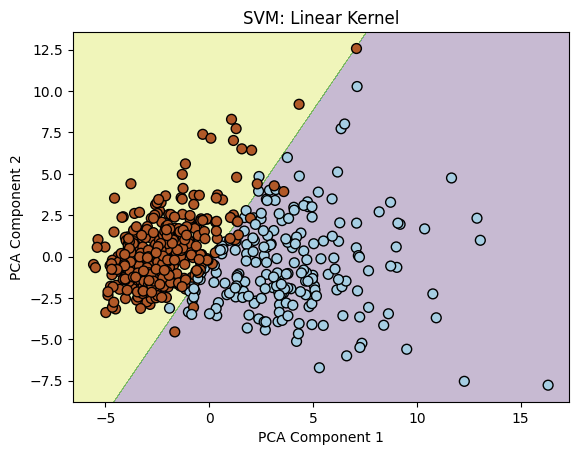

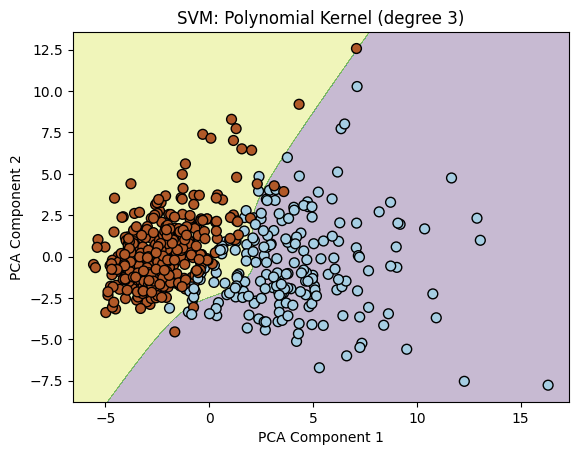

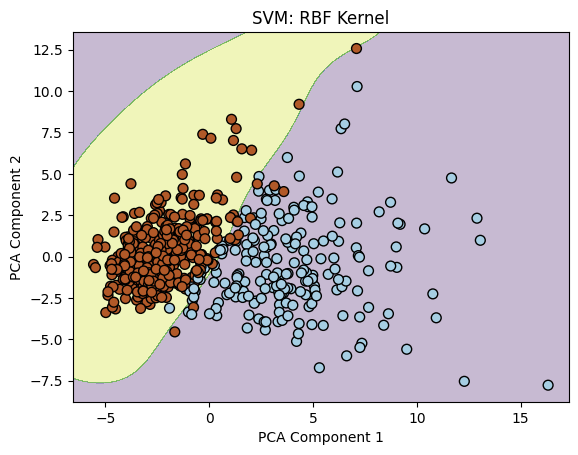

In [81]:
# Apply PCA to reduce the dataset to 2 dimensions for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

# Function to plot decision boundary
def plot_decision_boundary(X, y, clf, title):
    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict the class for each point on the grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired, edgecolors='k')
    plt.title(title)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.show()

# Train SVMs with different kernels on reduced data

# Linear SVM
linear_svm = SVC(kernel='linear').fit(X_reduced, y)
plot_decision_boundary(X_reduced, y, linear_svm, 'SVM: Linear Kernel')

# Polynomial SVM (degree 3)
poly_svm = SVC(kernel='poly', degree=3).fit(X_reduced, y)
plot_decision_boundary(X_reduced, y, poly_svm, 'SVM: Polynomial Kernel (degree 3)')

# RBF SVM (Radial Basis Function)
rbf_svm = SVC(kernel='rbf').fit(X_reduced, y)
plot_decision_boundary(X_reduced, y, rbf_svm, 'SVM: RBF Kernel')

Below we get the dataset and remove the ID column (irrelevant for classification)

Then we display some instances with df.head()

In [64]:
# get dataset with pandas
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv")
# Drop the first column
df = df.drop('ID', axis=1)
df.head()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


Some of the values on the dataset might be badly written (Nan or strings). Below we clean the dataset from these possible errors.

In [ ]:
print(f'previous dataset size: {df.shape}')
# Convert non-numeric values to NaN
for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')


# drop the Nan rows
df = df.dropna()
print(f'new dataset size = {df.shape}')

previous dataset size: (699, 10)
new dataset size = (683, 10)


Now we get the train and test set doing appropriate reshapes.

In [ ]:
# Get X, Y
X = df.drop(['Class'], axis=1).values
Y = df['Class']
Y = np.maximum(Y.to_numpy().reshape((-1, 1)) -3, 0)

# Scaling the Data
std = StandardScaler()
X = std.fit_transform(X)

# Train-Test Split (80-20)
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.20, random_state=0)

# Rearange and print the data shapes
xTrain, xTest, yTrain, yTest = xTrain.T, xTest.T, yTrain.T, yTest.T
print(f'Training data shapes : {xTrain.shape}, {yTrain.shape}')
print(f'Testing data shapes : {xTest.shape}, {yTest.shape}')

Training data shapes : (9, 546), (1, 546)
Testing data shapes : (9, 137), (1, 137)


In [ ]:
from sklearn.metrics import accuracy_score

def main():
  linear_svm = SVC(kernel = 'linear').fit(xTrain, yTrain.ravel())
  polynomial_svm = SVC(kernel = 'poly', degree = 5).fit(xTrain, yTrain.ravel())
  rbf_svm = SVC(kernel = 'rbf').fit(xTrain, yTrain.ravel())

  print(f'Accuracy for Linear Kernel: {accuracy_score(yTest, linear_svm.predict(xTest)):.2f}')
  print(f'Accuracy for 5 Degree Polynomial Kernel: {accuracy_score(yTest, polynomial_svm.predict(xTest)):.2f}')
  print(f'Accuracy for RBF Kernel: {accuracy_score(yTest, rbf_svm.predict(xTest)):.2f}')

  pass

main()

## References :
- Chapter 15 of the book : Understanding Machine Learning
- SVM Kernel Trick Example : https://vitalflux.com/machine-learning-svm-kernel-trick-example/
- SVM Course YouTube Playlist (Chapter 12) : https://www.youtube.com/playlist?list=PLLssT5z_DsK-h9vYZkQkYNWcItqhlRJLN

# Comments of the students:

To improve the experience of students that will take the course on the future any thoughtful comment or suggestion will be much appreciated!

**Comments:**